In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import inv
from numpy import dot
import seaborn as sns
import scipy
import sklearn
# 导入包


In [4]:
data_red=pd.read_csv("Data/winequality-red.csv",sep=";",index_col=False)
data_white=pd.read_csv("Data/winequality-white.csv",sep=";",index_col=False)

In [5]:
# from sklearn.preprocessing import Normalizer
red=["red"]*len(data_red)
data_red.insert(0,"Label",red)
white=["white"]*len(data_white)
data_white.insert(0,"Label",white)
data=pd.concat([data_red,data_white],axis=0)
data=data.set_index("Label",drop=True)
isDuplicated = data.duplicated() # 判断重复数据记录
# # print(isDuplicated)
data = data.drop_duplicates() # 删除数据记录中所有列值相同的记录
# scaler=Normalizer()
# data=scaler.transform(data)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Label,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6


In [6]:
class LinerRegression:
    # 梯度下降初始化方法
    def __init__(self,alpha,times):
        # alpha:学习率（权重调整幅度）
        # times 循环迭代次数
        self.alpha=alpha
        self.times=times
    def fit(self,X,y):
            X=np.array(X)
            y=np.array(y)
            # 转成数组
            
            self.w_=np.zeros(1+X.shape[1])
            self.loss_=[]
          
            for i in range(self.times):
                y_hat = np.dot(X,self.w_[1:])+self.w_[0]
            # 进行循环，多次迭代，每次迭代过程中，调整权重值，损失值不断减小
                error= y- y_hat
            # 计算真实值与预测值的差距
            self.loss_.append(np.sum(error**2)/2)
            # 将损失值加入损失列表当中
            self.w_[0] += self.alpha*np.sum(error)
            self.w_[1:] += self.alpha*np.dot(X.T,error)
            # 差距调整权重w_，调整为 权重（j）+学习率+sum（y-y_hat)*x(j)
    def predict(self,X):
                X=np.array(X)
                result = np.dot(X,self.w_[1:])+self.w_[0]
                return result
            

In [7]:
class StandardScaler:
    """
    该类对数据进行标准化处理
    """
    def fit(self,X):
        """
        根据传递的样本，计算每个特征列的均值与标准差。 
        Parameters:
        ______________
        X:类数组类型
          训练数据，用来计算均值与标准差。
        """
        X=np.array(X)
        #按列计算标准差
        self.std_=np.std(X,axis=0)
        #按列计算均值
        self.mean_=np.mean(X,axis=0)
        
    def transform(self,X):
        """
        对给定的数据X ，进行标准化处理（将X 的每一列都变成标准正态分布的数据）
        Parameters：
        ——————————————
        X：类数组类型
           带转换的数据
        Return:
        _________
        result:类数组类型。
             参数X转换成标准正态分布后的结果
        """
        return (X-self.mean_)/self.std_
    
    def fit_transform(self,X):
        """
        对数据进行训练，并转换，返回转换之后的结果。
        Parameters:
        ____________
        X:类数组类型
            待转换的数据
        Return：
        ————————————
        result：类数组类型
            参数X转换成标准正态分布后的结果。
        """
        self.fit(X)
        return self.transform(X)
        

In [8]:
# 为了避免由每个特征数量级的不同而带来的梯度下降过程中的影响
lr=LinerRegression(0.0005,times=100)
t=data.sample(len(data),random_state=0)
train_X=t.iloc[:3000,:-1]
train_y=t.iloc[:3000,-1]
test_X=t.iloc[3000:,:-1]
test_y=t.iloc[3000:,-1]
s=StandardScaler()
train_X=s.fit_transform(train_X)
test_X=s.fit_transform(test_X)

s2=StandardScaler()
train_y=s2.fit_transform(train_y)
test_y=s2.fit_transform(test_y)

lr.fit(train_X,train_y)
result=lr.predict(test_X)
display(result)
display(np.mean((result-test_y)**2))

array([-0.19341788,  0.44502937,  0.40684222, ..., -0.03308739,
        0.14065311,  1.07023054])

1.7001071077704437

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rcParams["font.family"]="SimHei"
# mpl.rcParams["axes.unicode_minus"]=False

/Users/empty/PycharmProjects/pythonProject1/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


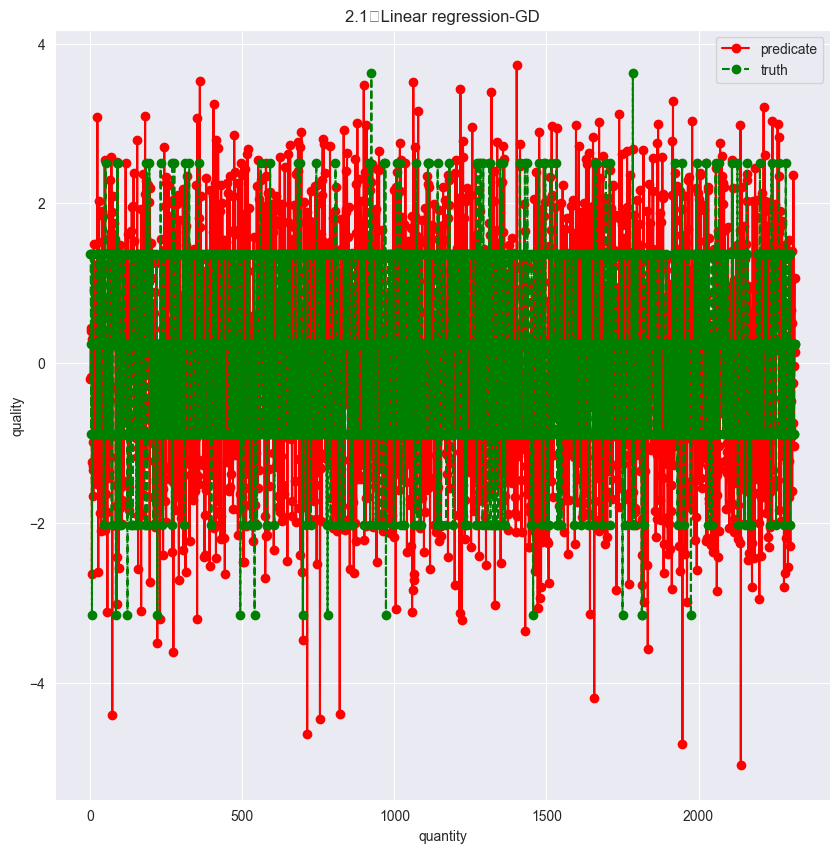

In [10]:
plt.figure(figsize=(10,10))
#绘制预测值
plt.plot(result,"ro-",label="predicate")
#绘制真实值
plt.plot(test_y.values,"go--",label="truth")
plt.title("2.1	Linear regression-GD")
plt.xlabel("quantity")
plt.ylabel("quality")
plt.legend()
plt.show()
